In [9]:
import rpyc
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import time
from tqdm import tqdm_notebook as tqdm

In [2]:
# Import the modules so that we can control the motors, sensors

conn = rpyc.classic.connect('ev3dev.local')
motor = conn.modules['ev3dev2.motor']      # import ev3dev2.ev3 remotely
sensor = conn.modules['ev3dev2.sensor.lego']
leds = conn.modules['ev3dev2.led']

In [3]:
# Make a reference for every motor/sensor we want to use

bot = motor.LargeMotor('outA') 
top = motor.LargeMotor('outB')
ts1 = sensor.TouchSensor('in1')
ts2 = sensor.TouchSensor('in2')
cs = sensor.ColorSensor('in4')

-----
## Q-table learning:

To Do:
- What do we need for q-table learnging?
- Use speed instead of Duty cycles (including the tank)


Draft:
Init:
- environement
    - Action set
    - State set: Discretized postitions and speed
    - Reward function: state x action -> reward
        - Takes into account: playing field
    
- Agent:
    - env.actions
    - hyper parameters
    - preprocess the state
    
    - Q-learning (table):
         - Value table: state -> V-value (expected reward)
         - Value-State table: state x action -> Q-value (expected reward if taken an action)
         
training:
- Environement: gives you the state
- preprocess state to state_1
- Agent: input = state_1, output = action
- Evironement: input = action, output = reward
- Agent: input: action, state, rewards
    Update weights
 

In [71]:
# Some high level variables

duty_cycle_actions = [10,-10]
measure_num = 5
measure_t_delta = .05


In [ ]:
# Agent
# Input: the parameters
# Output: The action

'''
class Agent(nn.Module):
  def __init__(self, input):
    super(self, initsdsadasd)
    self.layer_1 = nn.Conv2D(asdasdsa)
    
  def forward():
    x = self.layer_1(x)
    x = activation(x)
'''

    

In [72]:
top.run_direct(duty_cycle_sp = 0)
bot.run_direct(duty_cycle_sp = 0)

start = time.time()

# for data collection
greys = np.zeros((100,measure_num))
d_cycle_mem = np.zeros((100,2))
j = 0
while j < 100 and not ts1.is_pressed:
  print(time.time()-start)
  start = time.time()
  # randomly select some actions
  # This should later be changed to an architecture
  
  d_cycles = np.random.choice(duty_cycle_actions, size = 2)
  
  d_cycle_mem[j] = d_cycles
  
  # Step: 
  # assign the new values
  top.duty_cycle_sp, bot.duty_cycle_sp = d_cycles

  # Collect data
  
  for i in range(measure_num):
    greys[j,i] = np.mean(cs.raw)/256
    time.sleep(measure_t_delta)
  
  
    
  j += 1
# Once we stop reset the motors  
top.reset(), bot.reset()  



0.11942577362060547
0.7959320545196533
0.7834861278533936
0.8260498046875
0.7883310317993164
0.8418018817901611
0.8925127983093262
0.8723587989807129
0.8483381271362305
0.8360528945922852
0.8710238933563232
0.8273890018463135
0.8608958721160889
0.8508152961730957
0.8648431301116943
0.9309670925140381
0.8648200035095215
0.844789981842041
0.9173738956451416
0.8959629535675049
0.8709812164306641
0.8184490203857422
0.7861030101776123
0.8972117900848389
0.814924955368042
0.7698030471801758
0.9383230209350586
0.9646470546722412


(None, None)

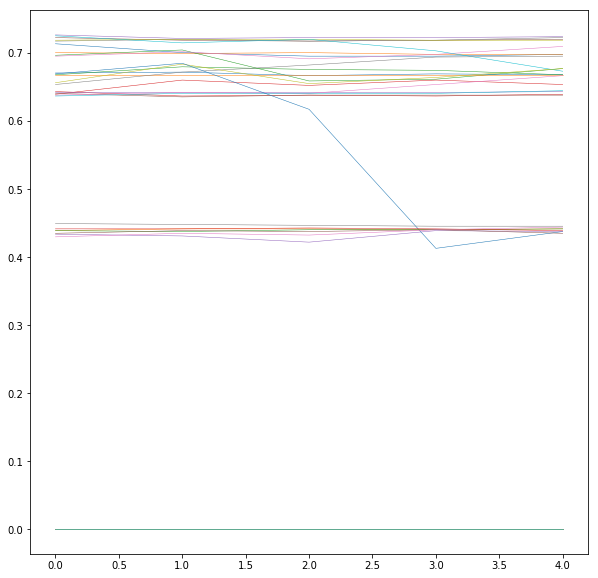

In [66]:
# Low values correspond to the line
plt.figure(figsize = (10,10))
plt.plot(greys.T, linewidth = .5)

plt.show()

In [80]:
top.reset()
bot.reset()


In [84]:
top.run_direct(speed_sp = 100)

([array([15., 16.,  0.,  0.,  0., 41.,  0.,  0., 16., 12.]),
  array([21.,  9.,  0.,  0.,  0., 31.,  0.,  0., 20., 19.])],
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 2 Lists of Patches objects>)

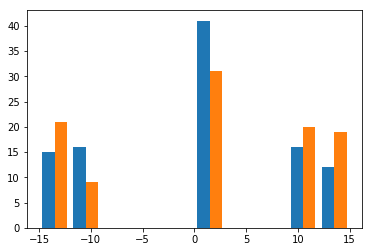

In [64]:
plt.hist(d_cycle_mem)

# Designing the playing field



In [85]:
tank = motor.MoveTank('outA','outB')

In [124]:
tank.on(-3,-3)

In [106]:
print(tank.__doc__)


    Controls a pair of motors simultaneously, via individual speed setpoints for each motor.

    Example:

    .. code:: python

        tank_drive = MoveTank(OUTPUT_A, OUTPUT_B)
        # drive in a turn for 10 rotations of the outer motor
        tank_drive.on_for_rotations(50, 75, 10)
    


In [125]:
tank.stop()